## Run Libraries

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Run Data

In [2]:
df = pd.read_csv("final_cars_datasets.csv")

## Run Top 5 Rows of Dataset

In [3]:
df.head(10)

,S. No.,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
5,5,190,daihatsu,mira,2004,81400,660,at,2wd,rhd,gasoline
6,8,220,nissan,march,2010,117000,1200,at,2wd,rhd,gasoline
7,9,230,volkswagen,passat,2008,127763,3190,at,4wd,rhd,gasoline
8,10,275,mazda,bongo van,2010,178218,1800,mt,2wd,rhd,gasoline
9,11,283,honda,step wgn,2005,121655,2000,at,2wd,rhd,gasoline


In [4]:
df['mark'].unique()

array(['nissan', 'toyota', 'daihatsu', 'volkswagen', 'mazda', 'honda',
       'subaru', 'mercedes-benz', 'kubota', 'mitsubishi', 'suzuki', 'bmw',
       'chrysler', 'smart', 'gm', 'opel', 'isuzu', 'land rover',
       'peugeot', 'hyundai', 'kia motors', 'audi', 'citroen', 'mitsuoka',
       'volvo', 'ford', 'hino', 'jaguar'], dtype=object)

## Run the shape of Data

In [5]:
df.shape

(2318, 11)

## Check Null Values

In [6]:
df.isnull().sum()

S. No.             0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

## Check Statistics of Data

In [7]:
df.describe()

,S. No.,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


## Count 'mark' rows in the data

In [8]:
df['mark'].count()

2318

## Run mark and prices in the same time

In [9]:
df[["mark", "price"]]

,mark,price
0,nissan,80
1,nissan,110
2,nissan,165
3,toyota,190
4,daihatsu,190
...,...,...
2313,toyota,1400
2314,toyota,1400
2315,subaru,1400
2316,honda,1400


## Show prices and mark on barplot

<Axes: xlabel='price', ylabel='mark'>

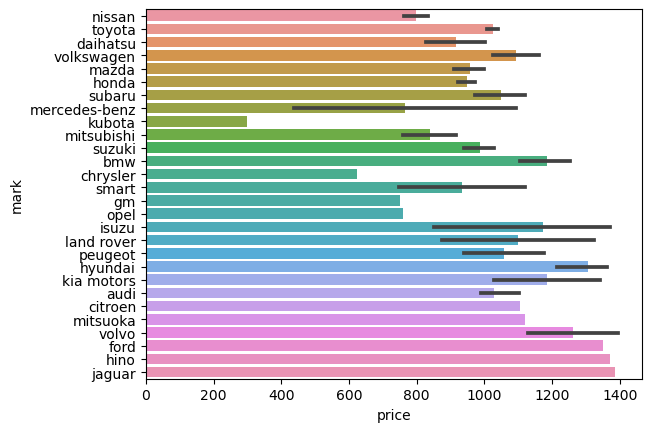

In [10]:
#sns.set(rc={'figure.figsize':(10, 5)})
sns.barplot(x=df['price'], y = df['mark'])

## Create Extrra Column For Age of Car

In [11]:
import datetime

In [12]:
date_time = datetime.datetime.now()

In [13]:
print(date_time)

2024-01-30 06:21:38.369110


In [14]:
df['Age'] = date_time.year - df['year']

In [15]:
df.drop(['S. No.', 'year'], axis=1, inplace=True)

In [16]:
df.head()

,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,Age
0,80,nissan,march,80000,1240,at,2wd,rhd,gasoline,21
1,110,nissan,march,53000,1200,at,2wd,rhd,gasoline,14
2,165,nissan,lafesta,47690,2000,at,2wd,rhd,gasoline,19
3,190,toyota,avensis,130661,1990,at,2wd,rhd,gasoline,16
4,190,daihatsu,mira,66300,660,at,2wd,rhd,gasoline,18


## Show 10 largest prices on mark wise and show on barplot

In [17]:
df1=df.nlargest(10, ["price"])

In [18]:
df2=df1[["mark", "price"]]

In [19]:
df2

,mark,price
2293,toyota,1400
2294,toyota,1400
2295,toyota,1400
2296,toyota,1400
2297,nissan,1400
2298,toyota,1400
2299,toyota,1400
2300,toyota,1400
2301,mazda,1400
2302,toyota,1400


## Show the maximum price cars brands using barplot 

<Axes: xlabel='mark', ylabel='price'>

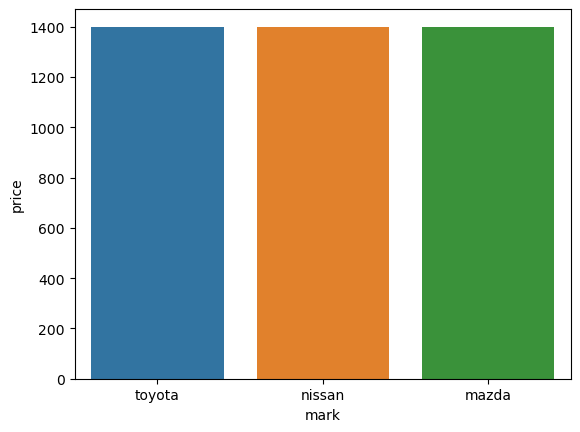

In [20]:
sns.barplot(x=df2['mark'], y = df2['price'])

## Line plot for Age of Cars and price

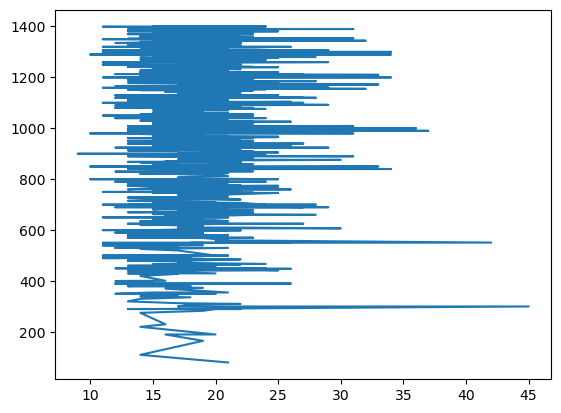

In [21]:
plt.plot(df['Age'], df['price'])
plt.show()

<Axes: xlabel='Age', ylabel='price'>

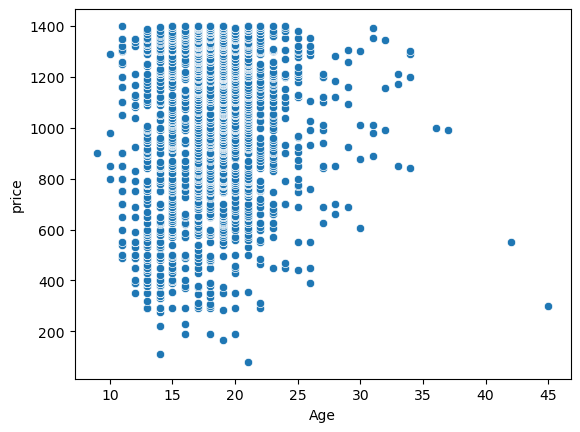

In [22]:
sns.scatterplot(x = df['Age'], y = df['price'])

## Count all columns categories

In [23]:
df['fuel'].value_counts()

fuel
gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: count, dtype: int64

In [24]:
df['transmission'].value_counts()

transmission
at     2171
mt      117
cvt      30
Name: count, dtype: int64

In [25]:
df['drive'].value_counts()

drive
2wd    2121
4wd     192
awd       5
Name: count, dtype: int64

In [26]:
df['hand_drive'].value_counts()

hand_drive
rhd       2301
lhd         16
center       1
Name: count, dtype: int64

In [27]:
##df['mark'].replace({'toyota':0, 'honda': 1, 'nissan': 2, 'mazda': 3, 'suzuki': 4,
##                   'mitsubishi': 5, 'daihatsu': 6, 'subaru': 7, 'volkswagen': 8, 'bmw': 9,
##                   'hyundai': 10, 'mercedes-benz': 11, 'kia motors': 12,
##                   'isuzu': 13, 'audi': 14, 'smart': 15, 'volvo': 16}, inplace=True)

In [28]:
#df['fuel'].replace({'gasoline': 0, 'diesel': 1, 'lpg': 2, 'hybrid': 3, 'cng': 4}, inplace = True)

In [29]:
#df['transmission'].replace({'at': 0, 'mt': 1, 'cvt': 2}, inplace=True)

In [30]:
#df['hand_drive'].replace({'rhd': 0, 'lhd': 1, 'center': 2}, inplace=True)

In [31]:
#df['drive'].replace({'2wd': 0, '4wd': 1, 'awd': 2}, inplace=True)

## Label Encoding for all columns and create data for model

In [32]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['model'] = label_encoder.fit_transform(df['model'])
df['mark'] = label_encoder.fit_transform(df['mark'])
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['drive'] = label_encoder.fit_transform(df['drive'])
df['hand_drive'] = label_encoder.fit_transform(df['hand_drive'])
df['fuel'] = label_encoder.fit_transform(df['fuel'])

In [33]:
df.head()

,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,Age
0,80,19,143,80000,1240,0,0,2,2,21
1,110,19,143,53000,1200,0,0,2,2,14
2,165,19,134,47690,2000,0,0,2,2,19
3,190,25,29,130661,1990,0,0,2,2,16
4,190,4,155,66300,660,0,0,2,2,18


In [115]:
df['Age'].unique()

array([21, 14, 19, 16, 18, 20, 22, 13, 17, 15, 45, 12, 26, 25, 23, 24, 11,
       42, 30, 27, 28, 29, 10, 34, 33, 31,  9, 32, 37, 36], dtype=int64)

<Axes: xlabel='Age', ylabel='count'>

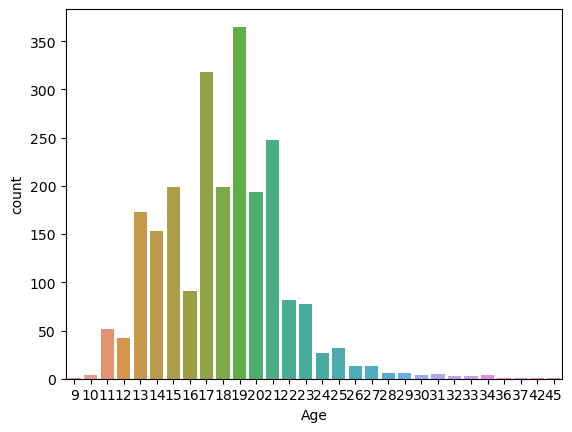

In [114]:
sns.countplot(x = df['Age'])

In [35]:
df['mark'].value_counts()

mark
25    1047
8      382
19     320
15     148
24     126
17      65
4       56
23      54
26      52
1       27
9        9
16       5
12       4
10       3
0        3
22       2
27       2
14       2
21       2
7        1
18       1
5        1
6        1
3        1
20       1
2        1
13       1
11       1
Name: count, dtype: int64

In [36]:
df.head()

,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,Age
0,80,19,143,80000,1240,0,0,2,2,21
1,110,19,143,53000,1200,0,0,2,2,14
2,165,19,134,47690,2000,0,0,2,2,19
3,190,25,29,130661,1990,0,0,2,2,16
4,190,4,155,66300,660,0,0,2,2,18


In [37]:
df.isnull().sum()

price              0
mark               0
model              0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
Age                0
dtype: int64

## Divide data into X and y training and testing

In [38]:
X = df.drop(['price'], axis=1)

In [39]:
y = df['price']

In [40]:
X

,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,Age
0,19,143,80000,1240,0,0,2,2,21
1,19,143,53000,1200,0,0,2,2,14
2,19,134,47690,2000,0,0,2,2,19
3,25,29,130661,1990,0,0,2,2,16
4,4,155,66300,660,0,0,2,2,18
...,...,...,...,...,...,...,...,...,...
2313,25,242,121000,996,0,0,2,2,15
2314,25,100,101000,3000,0,0,2,2,21
2315,23,195,101000,660,1,0,2,2,19
2316,8,256,170000,660,0,1,2,2,24


## Import libraries

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1854, 9) (1854,)
(464, 9) (464,)


In [43]:
X_train

,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,Age
1989,9,203,82333,1991,0,0,1,1,20
1827,25,130,121621,1300,0,0,2,2,20
2108,26,186,41000,1400,0,0,2,2,17
1173,8,212,95000,1970,0,0,2,2,27
2285,25,17,79800,2400,0,0,2,2,20
...,...,...,...,...,...,...,...,...,...
1638,25,242,86000,1000,0,0,2,2,19
1095,24,216,38900,1500,0,0,2,2,18
1130,19,143,84030,1200,0,1,2,2,13
1294,24,21,68000,660,0,0,2,2,19


## Standardize data for modelling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-1.45071473e+00,  8.11418132e-01, -3.33304926e-01, ...,
        -1.14642301e+01, -6.40868201e+00,  5.39778429e-01],
       [ 7.84121257e-01, -2.52956223e-01,  3.90159450e-01, ...,
         8.72278376e-02,  1.03868428e-02,  5.39778429e-01],
       [ 9.23798506e-01,  5.63550132e-01, -1.09442672e+00, ...,
         8.72278376e-02,  1.03868428e-02, -2.74059365e-01],
       ...,
       [-5.39422387e-02, -6.34101050e-02, -3.02055713e-01, ...,
         8.72278376e-02,  1.03868428e-02, -1.35917642e+00],
       [ 6.44444008e-01, -1.84222752e+00, -5.97238312e-01, ...,
         8.72278376e-02,  1.03868428e-02,  2.68499165e-01],
       [ 7.84121257e-01,  1.38005649e+00, -6.34067083e-01, ...,
         8.72278376e-02,  1.03868428e-02, -2.74059365e-01]])

In [46]:
X_test = scaler.transform(X_test)
X_test

array([[-0.05394224,  1.11760802, -0.50516638, ...,  0.08722784,
         0.01038684, -1.35917642],
       [-1.59039198, -0.63204846, -0.41309446, ...,  0.08722784,
         0.01038684,  0.26849916],
       [-2.14910098,  1.04470566,  1.53514752, ...,  0.08722784,
         0.01038684, -1.63045569],
       ...,
       [-0.05394224,  0.98638378, -0.39468007, ...,  0.08722784,
         0.01038684,  0.81105769],
       [ 0.78412126,  0.72393531, -0.19921137, ...,  0.08722784,
         0.01038684, -0.81661789],
       [-0.61265124,  0.59271107,  0.23503667, ...,  0.08722784,
         0.01038684, -0.0027801 ]])

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Testing data using Random forest regressor

In [89]:
RF = RandomForestRegressor(random_state=42)

In [90]:
RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [91]:
RF.score(X_test, y_test)

0.2695993390070932

## Find R2 score 

In [92]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [93]:
training_data_pred = RF.predict(X_train)

In [94]:
r2_score = metrics.r2_score(y_train, training_data_pred)
print("R Squared Erroe", r2_score)

R Squared Erroe 0.8930497887940214


In [73]:
from sklearn.model_selection import cross_val_score, KFold

In [74]:
# Assuming X_train_scaled and y_train are your training data
# You can adjust the number of folds in KFold as needed
kf = KFold(n_splits=5, shuffle=True, random_state=42)

## Perform cross validation 

In [77]:
# Perform cross-validation
Cross_val_score = cross_val_score(RF, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Cross-validation returns negative mean squared error, so we negate it to get positive values
cross_val_rmse = np.sqrt(-Cross_val_score)

In [78]:
# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", cross_val_rmse)
print("Mean RMSE:", np.mean(cross_val_rmse))

Cross-Validation RMSE Scores: [247.94659198 254.9846835  255.09939908 255.91743023 244.15831941]
Mean RMSE: 251.6212848395531


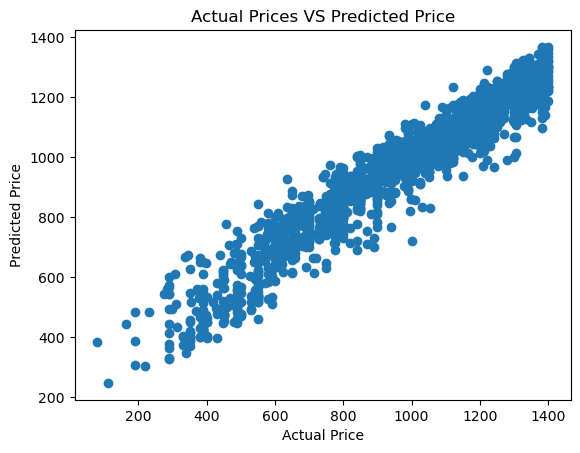

In [95]:
plt.scatter(y_train, training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices VS Predicted Price")
plt.show()

In [96]:
test_data_pred = RF.predict(X_test)

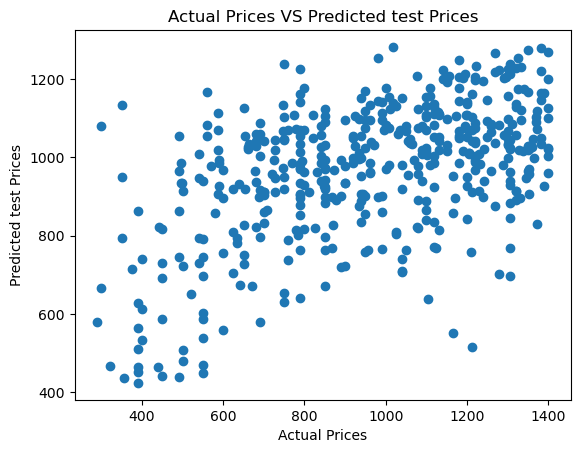

In [97]:
plt.scatter(y_test, test_data_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted test Prices")
plt.title("Actual Prices VS Predicted test Prices")
plt.show()

## Saved model into pikle file 

In [98]:
import joblib

In [100]:
joblib.dump(RF, 'Car_Prices_4.pkl')

['Car_Prices_4.pkl']

In [101]:
Model = joblib.load('Car_Prices_4.pkl')

In [102]:
X.head(10)

,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,Age
0,19,143,80000,1240,0,0,2,2,21
1,19,143,53000,1200,0,0,2,2,14
2,19,134,47690,2000,0,0,2,2,19
3,25,29,130661,1990,0,0,2,2,16
4,4,155,66300,660,0,0,2,2,18
5,4,155,81400,660,0,0,2,2,20
6,19,143,117000,1200,0,0,2,2,14
7,26,180,127763,3190,0,1,2,2,16
8,15,42,178218,1800,2,0,2,2,14
9,8,212,121655,2000,0,0,2,2,19


## Test model performance

In [105]:
Data = pd.DataFrame({
    "mark": 15,
    'model': 42,
    'mileage':178218, 
    "engine_capacity": 1800,
    'transmission': 2,
    'drive':0,
    'hand_drive': 2,
    "fuel": 2,
    "Age": 14
}, index=[0])

In [106]:
model.predict(Data)

array([875.18])